# Insight yang ingin kita cari:
### 1. Buku apa yang memiliki jumlah review terbanyak?
### 2. Siapa publisher dan author yang terpopuler?
### 3. Bahasa apa yang paling sering digunakan?
### 4. Statistika jumlah halaman buku
### 5. Statistika harga buku
### 6. Bagaimana korelasi antara jumlah halaman buku dengan harga buku?
### 7. Bagaimana persebaran rating buku?

In [1]:
# Import library yang dibutuhkan

import pandas as pd
import pandas_profiling as pp
import plotly.express as px
import numpy as np
import seaborn as sns
import statistics as sts
import sys
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
# Membaca data dari final_book_dataset_kaggle.csv

df = pd.read_csv("final_book_dataset_kaggle.csv")
df.head(6)

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...
5,Data Science from Scratch: First Principles wi...,[Joel Grus],45.22,406.0,4.4,594,0.65,0.19,0.08,0.04,0.04,6.9 x 0.9 x 9.1 inches,1.4 pounds,English,OReilly Media; 2nd edition (May 16 2019),978-1492041139,/Data-Science-Scratch-Principles-Python/dp/149...,https://www.amazon.com/Data-Science-Scratch-Pr...


In [3]:
# Mengecek jumlah data yang NaN

df.isnull().sum()

title              0
author           122
price              2
pages             12
avg_reviews      123
n_reviews          0
star5              0
star4              0
star3              0
star2              0
star1              0
dimensions        32
weight             3
language           3
publisher          4
ISBN_13            1
link               0
complete_link      0
dtype: int64

In [4]:
df.dropna(inplace = True)

In [5]:
df.isnull().sum()

title            0
author           0
price            0
pages            0
avg_reviews      0
n_reviews        0
star5            0
star4            0
star3            0
star2            0
star1            0
dimensions       0
weight           0
language         0
publisher        0
ISBN_13          0
link             0
complete_link    0
dtype: int64

In [6]:
df.describe()

,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,50.454513,430.237822,4.444556,150.881089,0.719140,0.162020,0.067049,0.030444,0.021261
std,36.399546,204.349437,0.401976,535.166053,0.150545,0.105296,0.063199,0.040292,0.033373
min,8.990000,48.000000,1.000000,1.000000,0.110000,0.000000,0.000000,0.000000,0.000000
25%,31.967500,286.250000,4.300000,10.000000,0.620000,0.110000,0.000000,0.000000,0.000000
50%,41.990000,392.000000,4.500000,33.000000,0.720000,0.150000,0.060000,0.020000,0.000000
75%,51.840000,543.500000,4.700000,101.750000,0.800000,0.200000,0.090000,0.040000,0.037500
max,279.950000,1728.000000,5.000000,7563.000000,1.000000,0.630000,0.400000,0.250000,0.230000


In [7]:
# Mengecek ukuran data
df.shape

(698, 18)

In [8]:
# Mengecek tipe datanya
df.dtypes

title             object
author            object
price            float64
pages            float64
avg_reviews      float64
n_reviews          int64
star5            float64
star4            float64
star3            float64
star2            float64
star1            float64
dimensions        object
weight            object
language          object
publisher         object
ISBN_13           object
link              object
complete_link     object
dtype: object

In [9]:
df.head(3)

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...


In [10]:
df.loc[df.duplicated()]

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link


#### Tampak tidak ada data yang duplikat

In [11]:
df['author'].value_counts()

[ERICK THOMPSON]                          5
[Yves Hilpisch]                           4
[Al Sweigart]                             4
[Denis Rothman]                           3
[Jim Frost]                               3
                                         ..
[Jules Damji,Brooke Wenig et al.]         1
[Daniel Covington]                        1
[Robert Carver]                           1
[Roger S. Bivand,Edzer Pebesma et al.]    1
[Donncha Hanna,Martin Dempster]           1
Name: author, Length: 653, dtype: int64

In [12]:
# Hapus kolom yang tidak penting
df.drop('ISBN_13', axis=1, inplace=True)

In [13]:
df.head(3)

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...


In [55]:
#df.loc[df['avg_reviews'] == 5.0].count()

title            70
author           70
price            70
pages            70
avg_reviews      70
n_reviews        70
star5            70
star4            70
star3            70
star2            70
star1            70
dimensions       70
weight           70
language         70
publisher        70
link             70
complete_link    70
dtype: int64

In [57]:
#df.loc[df['avg_reviews'] == 5.0].duplicated().unique()

array([False])

# 1. Buku apa yang memiliki jumlah review terbanyak

In [20]:
df[df['n_reviews'] == df['n_reviews'].max()]

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,link,complete_link
127,Cracking the Coding Interview: 189 Programming...,[Gayle Laakmann McDowell],35.95,687.0,4.7,7563,0.81,0.12,0.04,0.01,0.02,7 x 1.59 x 10 inches,2.69 pounds,English,CareerCup; 6th edition (July 1 2015),/Cracking-Coding-Interview-Programming-Questio...,https://www.amazon.com/Cracking-Coding-Intervi...


In [21]:
# Cara lain untuk mengetahuinya
most_review = df.loc[df['n_reviews'] == df['n_reviews'].max(), 'title'].iloc[0]
most_review

'Cracking the Coding Interview: 189 Programming Questions and Solutions'

In [61]:
# Jumlah review terbanyak
df['n_reviews'].max()

7563

### Kita mau memeriksa persentase rating bintang 5 yang diberikan oleh 7563 reviewer untuk buku tersebut

In [22]:
df.loc[df['title'] == most_review, 'star5'].iloc[0]

0.81

### 81% bintang 5 untuk sebuah buku yang memiliki total 7563 review menandakan bahwa buku tersebut memang bagus 

In [114]:
rating_salah.shape

(7, 17)

In [75]:
star5_max = df[df['star5'] == df['star5'].max()]
star5_max

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,link,complete_link
22,Effective Data Science Infrastructure: How to ...,[Ville Tuulos],49.99,352.0,5.0,5,1.0,0.0,0.0,0.0,0.0,7.38 x 0.8 x 9.25 inches,1.15 pounds,English,Manning (August 16 2022),/Effective-Data-Science-Infrastructure-scienti...,https://www.amazon.com/Effective-Data-Science-...
27,Be Data Driven: How Organizations Can Harness ...,[Jordan Morrow],34.99,240.0,5.0,1,1.0,0.0,0.0,0.0,0.0,6.14 x 0.55 x 9.21 inches,12 ounces,English,Kogan Page; 1st edition (August 30 2022),/Be-Data-Driven-Organizations-Harness/dp/13986...,https://www.amazon.com/Be-Data-Driven-Organiza...
33,Python for Data Analysis: Data Wrangling with ...,[Wes McKinney],62.99,579.0,5.0,1,1.0,0.0,0.0,0.0,0.0,9.1 x 1.2 x 6.9 inches,2.07 pounds,English,OReilly Media; 3rd edition (September 20 2022),/Python-Data-Analysis-Wrangling-Jupyter/dp/109...,https://www.amazon.com/Python-Data-Analysis-Wr...
45,Data Science Ethics: Concepts Techniques and C...,[David Martens],37.20,272.0,5.0,2,1.0,0.0,0.0,0.0,0.0,9.4 x 0.6 x 6.2 inches,15.5 ounces,English,Oxford University Press (June 24 2022),/Data-Science-Ethics-Techniques-Cautionary/dp/...,https://www.amazon.com/Data-Science-Ethics-Tec...
50,Simplify Big Data Analytics with Amazon EMR: A...,[Sakti Mishra],46.99,430.0,5.0,9,1.0,0.0,0.0,0.0,0.0,7.5 x 0.97 x 9.25 inches,1.62 pounds,English,Packt Publishing (March 25 2022),/Simplify-Big-Data-Analytics-Amazon/dp/1801071...,https://www.amazon.com/Simplify-Big-Data-Analy...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,Painless Statistics (Barrons Painless),[Patrick Honner],14.99,320.0,5.0,4,1.0,0.0,0.0,0.0,0.0,6 x 0.7 x 9 inches,15.2 ounces,English,In the 1930s Manuel H. Barron opened a bookst...,/Painless-Statistics-Barrons-Patrick-Honner/dp...,https://www.amazon.com/Painless-Statistics-Bar...
882,Modern Mathematical Statistics with Applicatio...,"[Jay L. Devore,Kenneth N. Berk et al.]",121.11,988.0,4.0,1,1.0,0.0,0.0,0.0,0.0,7.8 x 1.6 x 10.2 inches,4.98 pounds,English,Springer; 3rd ed. 2021 edition (April 30 2021),/Modern-Mathematical-Statistics-Applications-S...,https://www.amazon.com/Modern-Mathematical-Sta...
884,Statistics Made Simple for School Leaders: A N...,"[Susan Rovezzi Carroll,David J. Carroll]",35.00,140.0,5.0,1,1.0,0.0,0.0,0.0,0.0,6.04 x 0.41 x 8.64 inches,7.7 ounces,English,Rowman & Littlefield Publishers; 3rd edition (...,/Statistics-Made-Simple-School-Leaders/dp/1475...,https://www.amazon.com/Statistics-Made-Simple-...
914,Statistics and Probability with Applications (...,"[Daren S. Starnes,Josh Tabor et al.]",158.99,864.0,3.0,1,1.0,0.0,0.0,0.0,0.0,8.5 x 1 x 10.88 inches,3.98 pounds,English,W. H. Freeman; Fourth edition (January 15 2021),/Statistics-Probability-Applications-High-Scho...,https://www.amazon.com/Statistics-Probability-...


In [115]:
star5_max.shape

(75, 17)

In [116]:
reviews_max = df[df['avg_reviews'] == df['avg_reviews'].max()]
reviews_max

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,link,complete_link
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.0,0.0,0.0,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
22,Effective Data Science Infrastructure: How to ...,[Ville Tuulos],49.99,352.0,5.0,5,1.00,0.00,0.0,0.0,0.0,7.38 x 0.8 x 9.25 inches,1.15 pounds,English,Manning (August 16 2022),/Effective-Data-Science-Infrastructure-scienti...,https://www.amazon.com/Effective-Data-Science-...
27,Be Data Driven: How Organizations Can Harness ...,[Jordan Morrow],34.99,240.0,5.0,1,1.00,0.00,0.0,0.0,0.0,6.14 x 0.55 x 9.21 inches,12 ounces,English,Kogan Page; 1st edition (August 30 2022),/Be-Data-Driven-Organizations-Harness/dp/13986...,https://www.amazon.com/Be-Data-Driven-Organiza...
33,Python for Data Analysis: Data Wrangling with ...,[Wes McKinney],62.99,579.0,5.0,1,1.00,0.00,0.0,0.0,0.0,9.1 x 1.2 x 6.9 inches,2.07 pounds,English,OReilly Media; 3rd edition (September 20 2022),/Python-Data-Analysis-Wrangling-Jupyter/dp/109...,https://www.amazon.com/Python-Data-Analysis-Wr...
45,Data Science Ethics: Concepts Techniques and C...,[David Martens],37.20,272.0,5.0,2,1.00,0.00,0.0,0.0,0.0,9.4 x 0.6 x 6.2 inches,15.5 ounces,English,Oxford University Press (June 24 2022),/Data-Science-Ethics-Techniques-Cautionary/dp/...,https://www.amazon.com/Data-Science-Ethics-Tec...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,Hands-On Data Preprocessing in Python: Learn h...,[Roy Jafari],49.99,602.0,5.0,17,1.00,0.00,0.0,0.0,0.0,7.5 x 1.36 x 9.25 inches,2.25 pounds,English,Packt Publishing (January 21 2022),/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
817,The Recursive Book of Recursion: Ace the Codin...,[Al Sweigart],36.94,328.0,5.0,6,1.00,0.00,0.0,0.0,0.0,6.8 x 0.6 x 8.9 inches,1.6 pounds,English,No Starch Press (August 16 2022),/Recursive-Book-Recursion-Interview-Javascript...,https://www.amazon.com/Recursive-Book-Recursio...
843,Painless Statistics (Barrons Painless),[Patrick Honner],14.99,320.0,5.0,4,1.00,0.00,0.0,0.0,0.0,6 x 0.7 x 9 inches,15.2 ounces,English,In the 1930s Manuel H. Barron opened a bookst...,/Painless-Statistics-Barrons-Patrick-Honner/dp...,https://www.amazon.com/Painless-Statistics-Bar...
884,Statistics Made Simple for School Leaders: A N...,"[Susan Rovezzi Carroll,David J. Carroll]",35.00,140.0,5.0,1,1.00,0.00,0.0,0.0,0.0,6.04 x 0.41 x 8.64 inches,7.7 ounces,English,Rowman & Littlefield Publishers; 3rd edition (...,/Statistics-Made-Simple-School-Leaders/dp/1475...,https://www.amazon.com/Statistics-Made-Simple-...


In [117]:
reviews_max.shape

(70, 17)

In [108]:
df[df['star5'] == df['star5'].max()]['avg_reviews'].value_counts()

5.0    69
4.0     3
1.0     1
2.0     1
3.0     1
Name: avg_reviews, dtype: int64

### Tampak ada 6 data yang salah karena jika mendapatkan persentase 100% pada star5, maka seharusnya avg_reviews nya bernilai 5.0

In [113]:
rating_salah = df.loc[(df['avg_reviews'] == 5.0) ^ (df['star5'] == 1.0)]
rating_salah

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,link,complete_link
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.0,0.0,0.0,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
160,Applied Data Science: Lessons Learned for the ...,"[Martin Braschler,Thilo Stadelmann et al.]",179.99,478.0,1.0,1,1.00,0.00,0.0,0.0,0.0,6.14 x 1.06 x 9.21 inches,1.94 pounds,English,Springer; 1st ed. 2019 edition (June 25 2019),/Applied-Data-Science-Data-Driven-Business/dp/...,https://www.amazon.com/Applied-Data-Science-Da...
480,Deep Learning Pipeline: Building a Deep Learni...,"[Hisham El-Amir,Mahmoud Hamdy]",15.43,580.0,2.0,1,1.00,0.00,0.0,0.0,0.0,6.1 x 1.31 x 9.25 inches,1.94 pounds,English,Apress; 1st ed. edition (December 21 2019),/Deep-Learning-Pipeline-Building-TensorFlow/dp...,https://www.amazon.com/Deep-Learning-Pipeline-...
525,Deep Learning with Python: Learn Best Practice...,"[Nikhil Ketkar,Jojo Moolayil]",32.99,324.0,4.0,2,1.00,0.00,0.0,0.0,0.0,6.1 x 0.73 x 9.25 inches,1.1 pounds,English,Apress; 2nd ed. edition (April 10 2021),/Deep-Learning-Python-Practices-PyTorch/dp/148...,https://www.amazon.com/Deep-Learning-Python-Pr...
557,Hands-On Deep Learning with Apache Spark: Buil...,[Guglielmo Iozzia],46.99,322.0,4.0,1,1.00,0.00,0.0,0.0,0.0,7.5 x 0.73 x 9.25 inches,1.22 pounds,English,Packt Publishing (January 31 2019),/sspa/click?ie=UTF8&spc=MTozNjU4MTEyNDI0ODc2MT...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
882,Modern Mathematical Statistics with Applicatio...,"[Jay L. Devore,Kenneth N. Berk et al.]",121.11,988.0,4.0,1,1.00,0.00,0.0,0.0,0.0,7.8 x 1.6 x 10.2 inches,4.98 pounds,English,Springer; 3rd ed. 2021 edition (April 30 2021),/Modern-Mathematical-Statistics-Applications-S...,https://www.amazon.com/Modern-Mathematical-Sta...
914,Statistics and Probability with Applications (...,"[Daren S. Starnes,Josh Tabor et al.]",158.99,864.0,3.0,1,1.00,0.00,0.0,0.0,0.0,8.5 x 1 x 10.88 inches,3.98 pounds,English,W. H. Freeman; Fourth edition (January 15 2021),/Statistics-Probability-Applications-High-Scho...,https://www.amazon.com/Statistics-Probability-...


### Data tersebut adalah data yang salah karena average review tidak sesuai dengan persentase star5 nya

In [94]:
df[df['star5'] == df['star5'].max()]['n_reviews'].value_counts()

1     27
2     15
6      7
4      7
3      6
8      4
7      3
5      2
9      1
14     1
13     1
17     1
Name: n_reviews, dtype: int64

### Tampak bahwa sebagian besar yang mendapatkan rata-rata rating maksimum 5.0 hanya memiliki sedikit review
### Artinya, rata-rata rating 5.0 belum cukup valid untuk mewakili kualitas buku tersebut karena sedikitnya jumlah reviewer

# 2. Mencari publisher dan author yang paling populer

In [25]:
df['publisher'].value_counts()

Packt Publishing (July 29 2022)                                   4
Packt Publishing (April 29 2022)                                  4
Packt Publishing (January 21 2022)                                3
Packt Publishing (March 29 2019)                                  3
Packt Publishing (November 30 2018)                               3
                                                                 ..
OReilly Media; 2nd edition (August 25 2020)                       1
CreateSpace Independent Publishing Platform (February 19 2016)    1
SAS Institute; 3rd edition (October 18 2019)                      1
OReilly Media; 2nd edition (January 8 2019)                       1
For Dummies; 1st edition (January 29 2013)                        1
Name: publisher, Length: 650, dtype: int64

In [26]:
df['author'].value_counts()

[ERICK THOMPSON]                          5
[Yves Hilpisch]                           4
[Al Sweigart]                             4
[Denis Rothman]                           3
[Jim Frost]                               3
                                         ..
[Jules Damji,Brooke Wenig et al.]         1
[Daniel Covington]                        1
[Robert Carver]                           1
[Roger S. Bivand,Edzer Pebesma et al.]    1
[Donncha Hanna,Martin Dempster]           1
Name: author, Length: 653, dtype: int64

### Tampak bahwa penulis yang paling banyak menulis buku di sini adalah Erick Thompson

In [27]:
most_review_publisher = df.loc[df['title'] == most_review, 'publisher'].iloc[0]
most_review_publisher

'CareerCup; 6th edition (July 1 2015)'

In [28]:
# min_review_title = df.loc[df['n_reviews'] == df['n_reviews'].min(), 'title'].iloc[0]
# df.loc[df['title'] == min_review_title, 'publisher'].iloc[0]

In [29]:
most_review_author = df.loc[df['title'] == most_review, 'author'].iloc[0]
most_review_author

'[Gayle Laakmann McDowell]'

In [30]:
# df.loc[df['title'] == min_review_title, 'author'].iloc[0]

In [31]:
df[df['author'] == most_review_author]['title'].count()

1

#### Ternyata author yang bukunya paling banyak direview hanya membuat 1 buku saja

In [32]:
df[df['author'] == most_review_author]['title'].count()

1

#### Ternyata publisher yang bukunya paling banyak direview hanya mempublish 1 buku saja

In [33]:
df.head(5)

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...


# 3. Bahasa apa yang paling sering digunakan?

In [34]:
df['language'].unique()

array(['English', 'Spanish'], dtype=object)

In [35]:
df['language'].value_counts()

English    697
Spanish      1
Name: language, dtype: int64

In [16]:
df.loc[df['language'] == 'Spanish']

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,link,complete_link
719,El lenguaje de programaciÃ³n Python de princip...,[Angel Pablo Hinojosa GutiÃ©rrez],18.83,734.0,5.0,1,1.0,0.0,0.0,0.0,0.0,6.89 x 1.66 x 9.37 inches,3.15 pounds,Spanish,Independently published (July 13 2022),/lenguaje-programaci%C3%B3n-Python-principio-S...,https://www.amazon.com/lenguaje-programaci%C3%...


### Tampak bahwa hanya ada 1 buku yang menggunakan bahasa Spanyol dan sisanya menggunakan bahasa Inggris

In [36]:
#Cek cara ngegroup language berdasarkan rating

In [37]:
# # Mengecek pengaruh test preparation course terhadap math score
# plt.figure(figsize = (5,5))
# ax = sns.barplot(data = df, x = 'language', y = 'avg_reviews')

# # Untuk menampilkan nilai detail di atas bar
# for i in ax.containers:
#     ax.bar_label(i,)

# 4. Statistika jumlah halaman buku

In [38]:
df['pages'].describe()

count     698.000000
mean      430.237822
std       204.349437
min        48.000000
25%       286.250000
50%       392.000000
75%       543.500000
max      1728.000000
Name: pages, dtype: float64

In [39]:
df['pages'].max()

1728.0

In [40]:
df.loc[df['pages'] == df['pages'].max(), 'title'].iloc[0]

'C++ Programming: Program Design Including Data Structures (MindTap Course List)'

#### Buku tersebut memiliki halaman terbanyak, yaitu sebanyak 1728 halaman

In [41]:
df['pages'].min()

48.0

In [42]:
df.loc[df['pages'] == df['pages'].min(), 'title'].iloc[0]

'How to Work With Probability and Statistics Grades 6-8 (Math How To...)'

#### Buku tersebut memiliki halaman paling sedikit, yaitu hanya 48 halaman

<AxesSubplot:xlabel='title', ylabel='pages'>

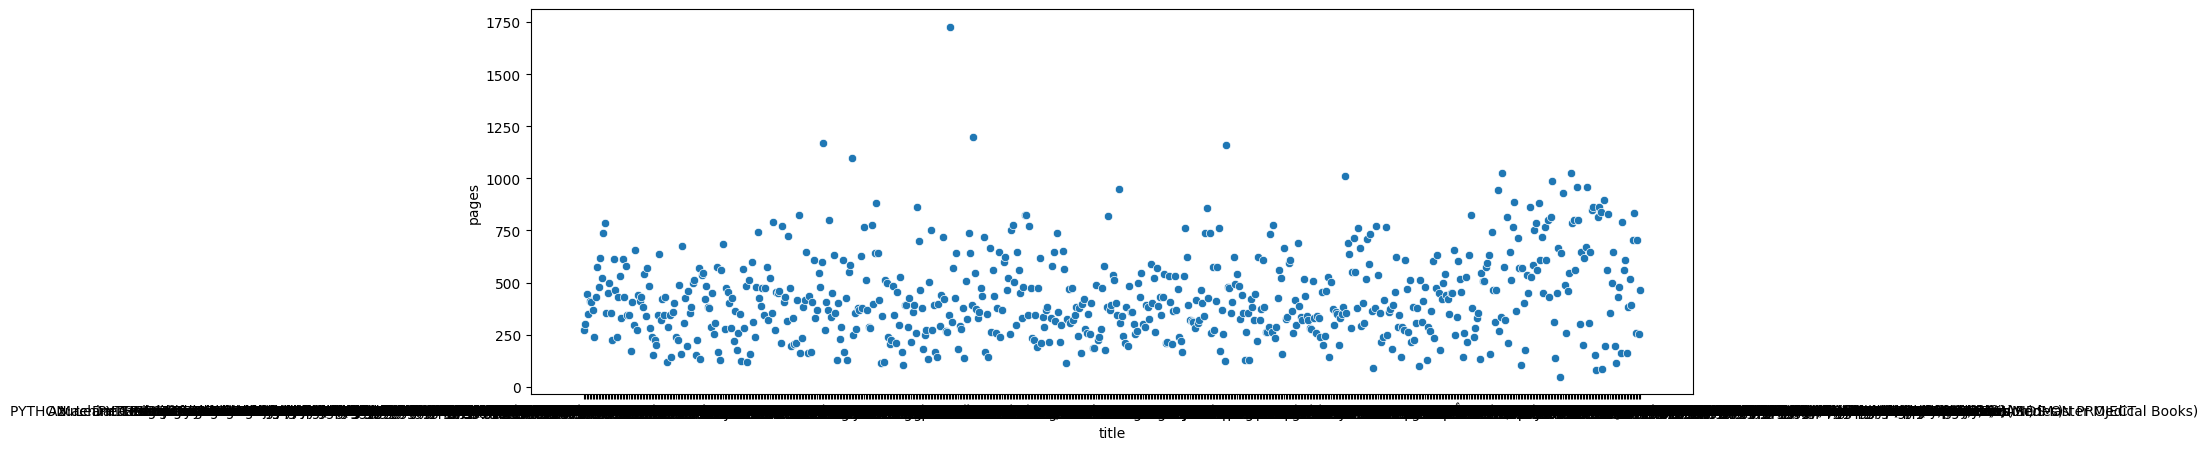

In [43]:
plt.figure(figsize = (15,5))
sns.scatterplot(data=df, x='title', y='pages')

<AxesSubplot:>

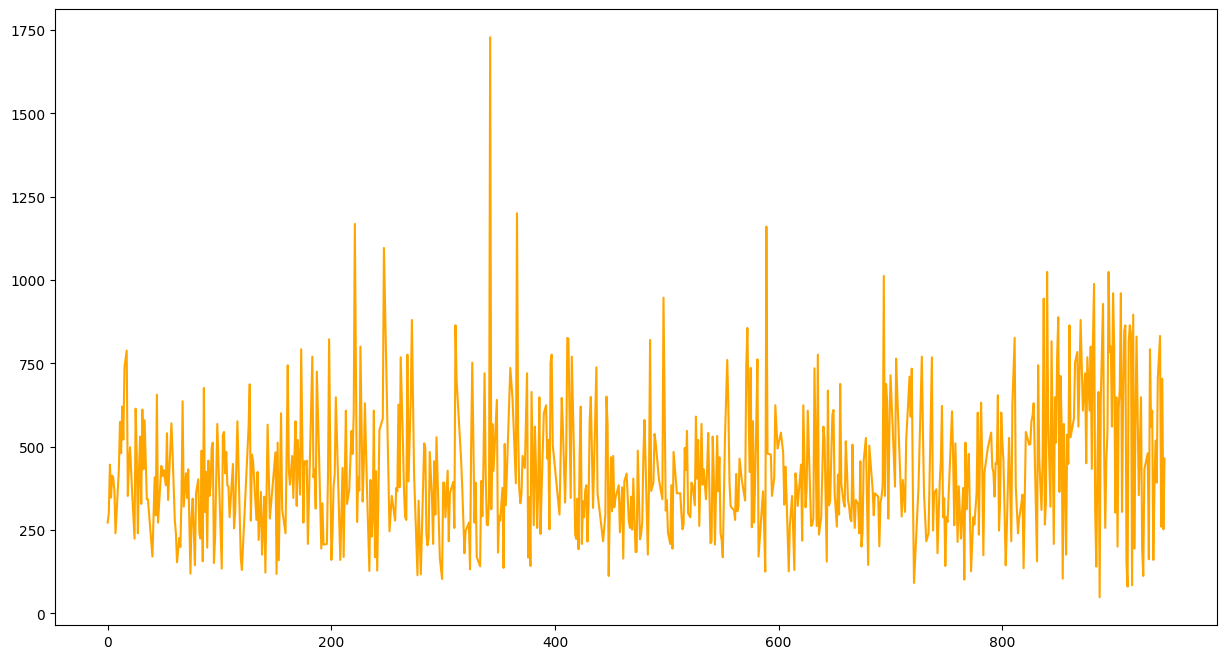

In [44]:
plt.figure(figsize=(15,8))
df['pages'].plot(color = 'orange')

### Tampak bahwa persebaran terbanyak halaman buku ada di sekitar 250 - 750 halaman

# 5. Bagaimana statistika harga buku?

In [45]:
df['price'].describe()

count    698.000000
mean      50.454513
std       36.399546
min        8.990000
25%       31.967500
50%       41.990000
75%       51.840000
max      279.950000
Name: price, dtype: float64

In [46]:
buku_termahal = df.loc[df['price'] == df['price'].max(), 'title'].iloc[0]
harga_termahal = df['price'].max()
print("Buku termahal adalah:", buku_termahal, "seharga", harga_termahal, "dollar")

Buku termahal adalah: Using SPSS for Windows and Macintosh (7th Edition) seharga 279.95 dollar


In [47]:
buku_termurah = df.loc[df['price'] == df['price'].min(), 'title'].iloc[0]
harga_termurah = df['price'].min()
print("Buku termurah adalah:", buku_termurah, "seharga", harga_termurah, "dollar")

Buku termurah adalah: How to Work With Probability and Statistics Grades 6-8 (Math How To...) seharga 8.99 dollar


In [48]:
# # Mengecek pengaruh test preparation course terhadap math score
# plt.figure(figsize = (5,5))
# ax = sns.barplot(data = df, x = 'price', y = 'pages')

# # Untuk menampilkan nilai detail di atas bar
# # for i in ax.containers:
# #     ax.bar_label(i,)

# 6. Bagaimana korelasi antara harga buku dengan jumlah halaman buku?

<AxesSubplot:xlabel='pages', ylabel='price'>

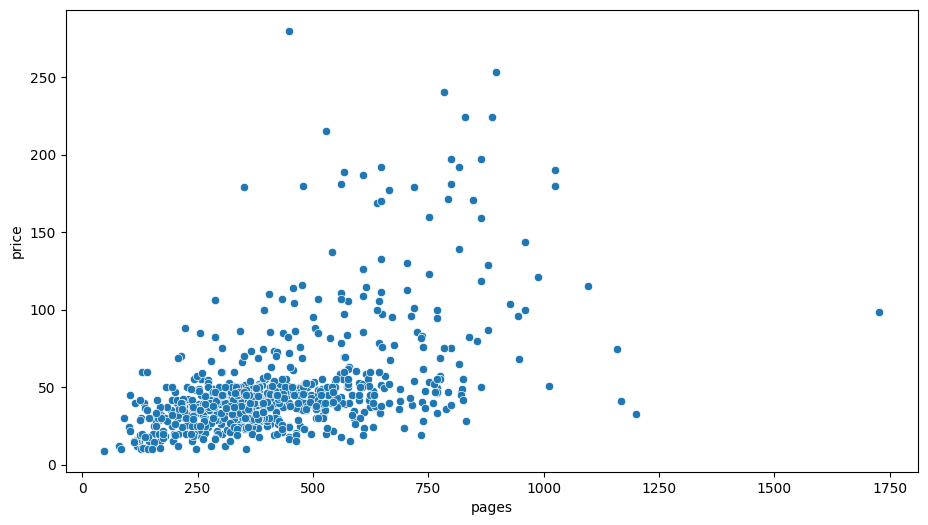

In [49]:
plt.figure(figsize = (11,6))
sns.scatterplot(data=df, x='pages', y='price')

In [50]:
df['pages'].corr(df['price'])

0.5092715703487846

In [ ]:
# Cara lain cari korelasi antar 2 variabel
# print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates', 'ExitRates'])
# print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue', 'PageValues'])
# print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType', 'Weekend'])

# 7. Bagaimana statistika rating buku?

In [59]:
df.loc[df['avg_reviews'] == 5.0]

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,link,complete_link
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.0,0.0,0.0,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
22,Effective Data Science Infrastructure: How to ...,[Ville Tuulos],49.99,352.0,5.0,5,1.00,0.00,0.0,0.0,0.0,7.38 x 0.8 x 9.25 inches,1.15 pounds,English,Manning (August 16 2022),/Effective-Data-Science-Infrastructure-scienti...,https://www.amazon.com/Effective-Data-Science-...
27,Be Data Driven: How Organizations Can Harness ...,[Jordan Morrow],34.99,240.0,5.0,1,1.00,0.00,0.0,0.0,0.0,6.14 x 0.55 x 9.21 inches,12 ounces,English,Kogan Page; 1st edition (August 30 2022),/Be-Data-Driven-Organizations-Harness/dp/13986...,https://www.amazon.com/Be-Data-Driven-Organiza...
33,Python for Data Analysis: Data Wrangling with ...,[Wes McKinney],62.99,579.0,5.0,1,1.00,0.00,0.0,0.0,0.0,9.1 x 1.2 x 6.9 inches,2.07 pounds,English,OReilly Media; 3rd edition (September 20 2022),/Python-Data-Analysis-Wrangling-Jupyter/dp/109...,https://www.amazon.com/Python-Data-Analysis-Wr...
45,Data Science Ethics: Concepts Techniques and C...,[David Martens],37.20,272.0,5.0,2,1.00,0.00,0.0,0.0,0.0,9.4 x 0.6 x 6.2 inches,15.5 ounces,English,Oxford University Press (June 24 2022),/Data-Science-Ethics-Techniques-Cautionary/dp/...,https://www.amazon.com/Data-Science-Ethics-Tec...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,Hands-On Data Preprocessing in Python: Learn h...,[Roy Jafari],49.99,602.0,5.0,17,1.00,0.00,0.0,0.0,0.0,7.5 x 1.36 x 9.25 inches,2.25 pounds,English,Packt Publishing (January 21 2022),/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
817,The Recursive Book of Recursion: Ace the Codin...,[Al Sweigart],36.94,328.0,5.0,6,1.00,0.00,0.0,0.0,0.0,6.8 x 0.6 x 8.9 inches,1.6 pounds,English,No Starch Press (August 16 2022),/Recursive-Book-Recursion-Interview-Javascript...,https://www.amazon.com/Recursive-Book-Recursio...
843,Painless Statistics (Barrons Painless),[Patrick Honner],14.99,320.0,5.0,4,1.00,0.00,0.0,0.0,0.0,6 x 0.7 x 9 inches,15.2 ounces,English,In the 1930s Manuel H. Barron opened a bookst...,/Painless-Statistics-Barrons-Patrick-Honner/dp...,https://www.amazon.com/Painless-Statistics-Bar...
884,Statistics Made Simple for School Leaders: A N...,"[Susan Rovezzi Carroll,David J. Carroll]",35.00,140.0,5.0,1,1.00,0.00,0.0,0.0,0.0,6.04 x 0.41 x 8.64 inches,7.7 ounces,English,Rowman & Littlefield Publishers; 3rd edition (...,/Statistics-Made-Simple-School-Leaders/dp/1475...,https://www.amazon.com/Statistics-Made-Simple-...


#### Tampak ada 70 buku yang memiliki rating 5.0

<AxesSubplot:xlabel='avg_reviews', ylabel='count'>

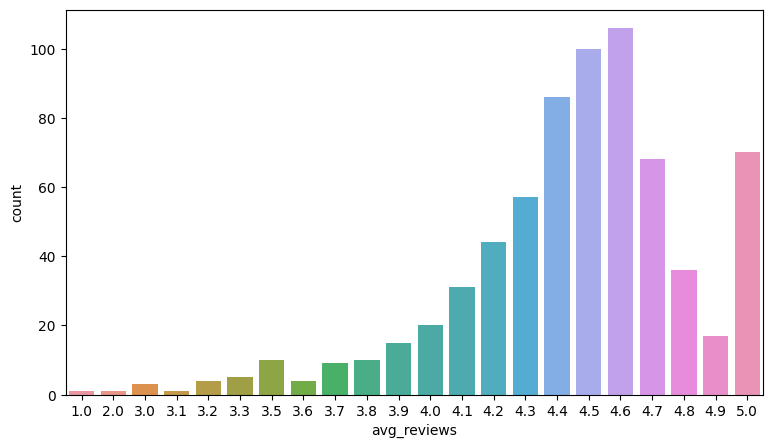

In [51]:
plt.figure(figsize = (9,5))
sns.countplot(data=df, x='avg_reviews')

<AxesSubplot:xlabel='title', ylabel='avg_reviews'>

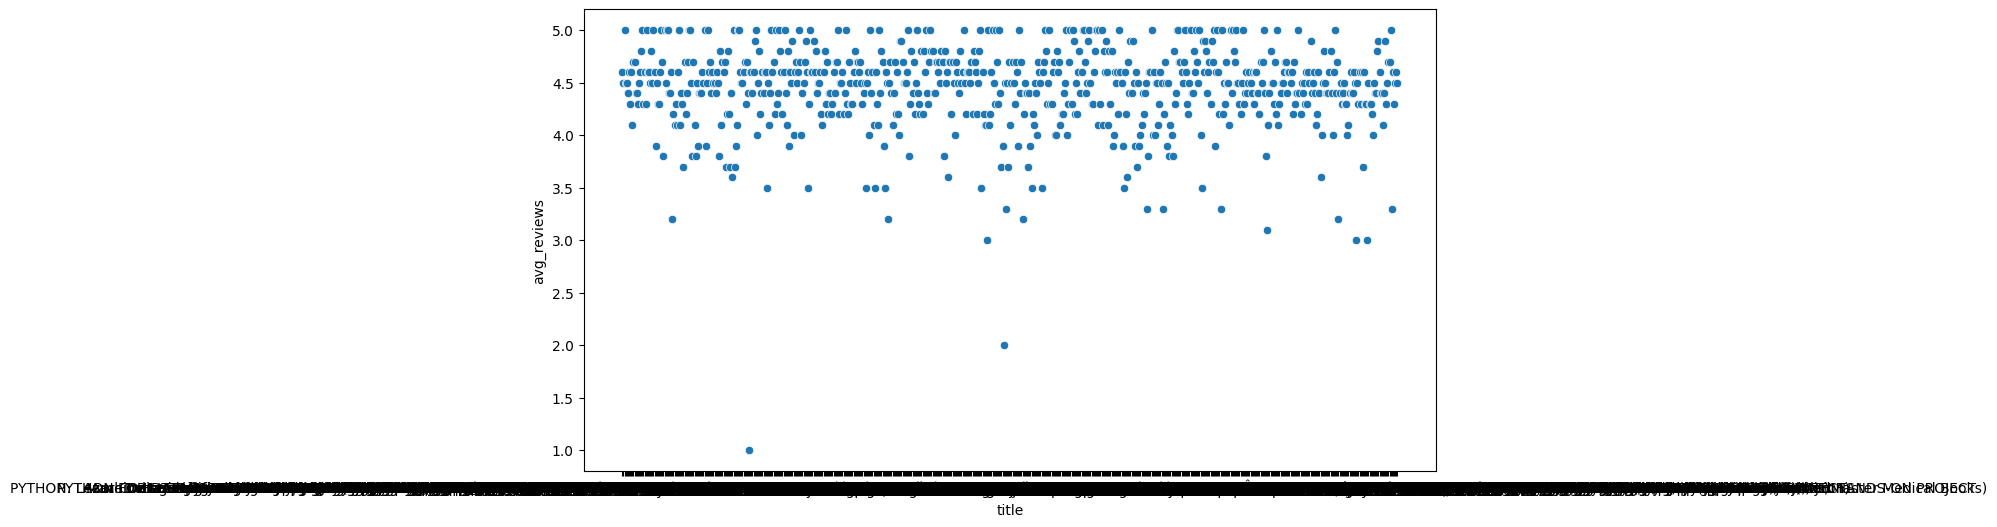

In [52]:
plt.figure(figsize = (11,6))
sns.scatterplot(data=df, x='title', y='avg_reviews')

<AxesSubplot:>

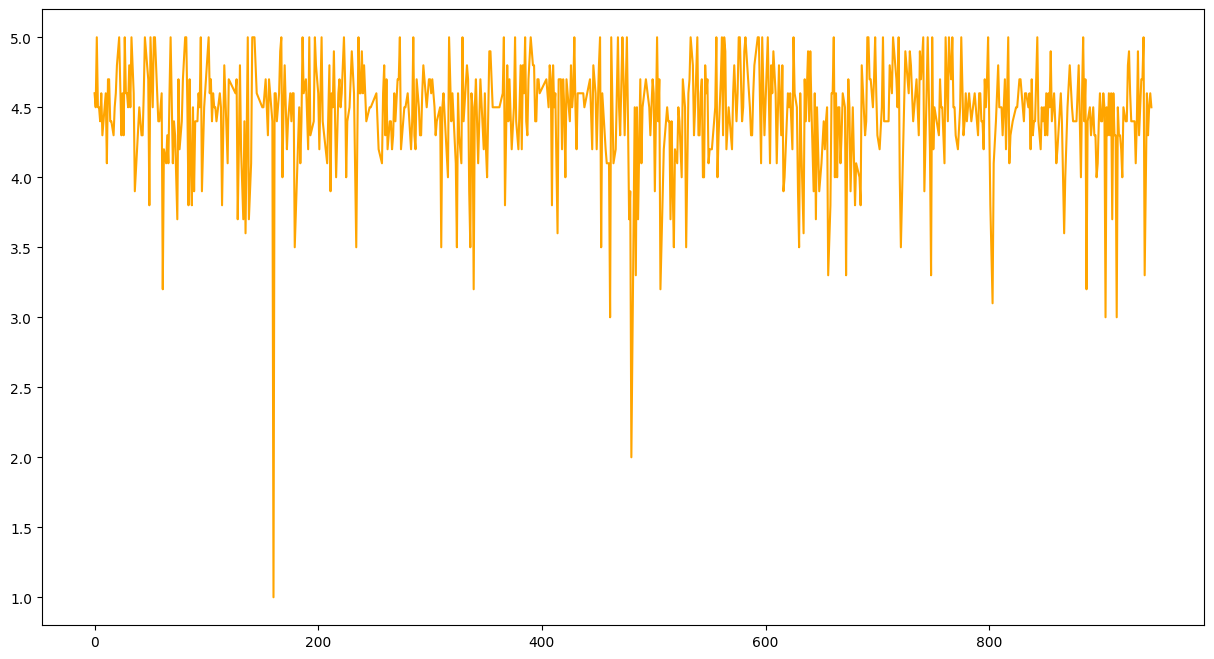

In [53]:
plt.figure(figsize=(15,8))
df['avg_reviews'].plot(color = 'orange')

### Tampak bahwa persebaran terbanyak rating ada di antara 4.0 - 5.0